In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#This code will allow you to input a stock ticker to test the defined trading strategy implemented witin the code. 
#Further work on this project will output the resulting data into an excel file so that further analysis can be done. 
#This code will output the win percentage for the trading strategy as well as the number of trades entered, and the average dollar per share gain or loss onwinning and losing  trades.

#If you would like to know what the annual rate of return for this strategy is, feel free to email me @ stewart9@vt.edu for the excel file which contains that information.

In [4]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [5]:
tickers = tickers['Symbol'].to_list()
tickers.head()


AttributeError: 'list' object has no attribute 'head'

In [6]:
tickers = [i.replace('.', '-') for i in tickers]

In [7]:
tickers.pop(474)
tickers.pop(489)

'WU'

In [8]:
ticker = 'NFLX'
ticker_index = tickers.index(ticker)
ticker_index

330

In [9]:
def RSIcalc(asset):
    df = yf.download(asset, start='2011-07-08')
    df['MA200'] = df['Adj Close'].rolling(window=270).mean()
    df['price change'] = df['Adj Close'].pct_change()
    df['Upmove'] = df['price change'].apply(lambda x: x if x>0 else 0)
    df['Downmove'] = df['price change'].apply(lambda x: abs(x) if x<0 else 0)
    df['Avg Up'] = df['Upmove'].ewm(span=19).mean()
    df['Avg Down'] = df['Downmove'].ewm(span=19).mean()
    df = df.dropna()
    df['RS'] = df['Avg Up']/df['Avg Down']
    df['RSI'] = df['RS'].apply(lambda x: 100 - (100/(x+1)))
    df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI'] < 30), 'Buy'] = 'Yes'
    df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI'] > 30), 'Buy'] = 'No'
    return df

In [10]:
def getSignals(df):
    Buy_Dates = []
    Sell_Dates = []
    
    for i in range(0,len(df)):
        if "Yes" in df['Buy'].iloc[i]:
            Buy_Dates.append(df.iloc[i+1].name)
            for j in range(1,11):
                if df['RSI'].iloc[i + j] > 40:
                    Sell_Dates.append(df.iloc[i+j+1].name)
                    break
                elif j ==10:
                    Sell_Dates.append(df.iloc[i+j+1].name)
    return Buy_Dates, Sell_Dates


In [11]:
tickers[ticker_index]

'NFLX'

In [12]:
frame = RSIcalc(tickers[ticker_index])
buy, sell = getSignals(frame)
#buy, sell = getSignals(frame)


[*********************100%***********************]  1 of 1 completed


<ipython-input-9-8b79bf278ac2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['Avg Up']/df['Avg Down']
<ipython-input-9-8b79bf278ac2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100 - (100/(x+1)))
C:\Users\baske\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

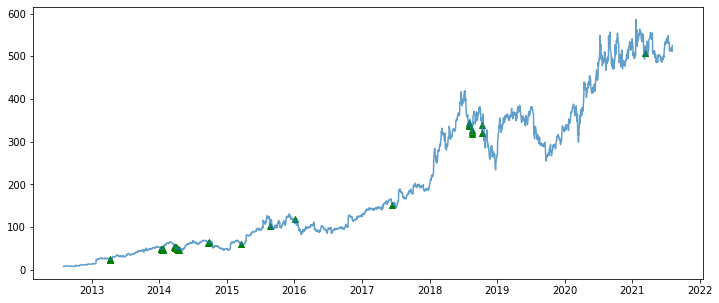

In [13]:
plt.figure(figsize=(12,5))
plt.scatter(frame.loc[buy].index,frame.loc[buy]['Adj Close'], marker= '^', c='g')
plt.plot(frame['Adj Close'], alpha=.7)

In [14]:
Profits = frame.loc[sell]['Open'].values - frame.loc[buy]['Open'].values

In [15]:
Percent_Profits = (Profits/frame.loc[buy]['Open'].values)*100
Percent_Profits  

array([  1.30856673,   2.75857625,  15.04766361,  12.26262783,
        13.49128529,  15.86989594,  12.37113596,  16.82957178,
        15.54190154,  15.48625597,  16.44309049, -16.02505404,
       -10.27704415,  -5.89260218,  -4.45541016,  -8.16723289,
        -7.91679716,  -6.44491775,  -9.46507777,  -6.79988226,
        -1.73019941,   2.58142218,   2.72019158,   5.59251015,
         4.92956091,   5.51276346,   0.64365788,  -0.08774593,
         4.93100686,   6.67285609,  10.51381859,   0.48581421,
         6.55183873,   5.16867125,   4.74453622,   2.60381828,
         6.10638534,   7.58008342,   3.90533709,  -0.57131148,
         1.0230436 ])

In [18]:
wins = [i for i in Profits if i>0] #finds number of profitable trades

In [19]:
wins #dollar amount per share profit for each winning trade


[0.3099994659423828,
 0.6442852020263672,
 7.2385711669921875,
 5.987140655517578,
 6.515712738037109,
 7.50714111328125,
 6.0342864990234375,
 7.895713806152344,
 7.372856140136719,
 7.349998474121094,
 7.739997863769531,
 1.2557144165039062,
 1.3214302062988281,
 2.6428604125976562,
 2.344287872314453,
 2.6071434020996094,
 0.4057159423828125,
 2.9457130432128906,
 7.19000244140625,
 11.069999694824219,
 0.75,
 21.720001220703125,
 17.360015869140625,
 16.0,
 8.589996337890625,
 19.47998046875,
 23.8499755859375,
 12.69000244140625,
 5.19000244140625]

In [20]:
len(wins)/len(Profits) #calculates win rate of strategy

0.7073170731707317

In [21]:
len(Profits) #number of trades entered into over the 10 year period

41

In [ ]:
Percent_Profits.mean() #average percent gained on each trade

In [22]:
Average_return_of_profitable_trade = (sum(wins)/len(wins))
Average_return_of_profitable_trade #average return per share in dollar amount for a profitable trade

7.655467066271552

In [24]:
losses = [i for i in Profits if i<0]

In [25]:
losses

[-9.282855987548828,
 -5.5642852783203125,
 -3.1399993896484375,
 -2.361431121826172,
 -4.202857971191406,
 -4.088573455810547,
 -3.2385711669921875,
 -4.944286346435547,
 -3.5100021362304688,
 -0.878570556640625,
 -0.055713653564453125,
 -1.94000244140625]

In [29]:
average_dollar_loss_on_losing_trade = sum(losses)/len(losses)
average_dollar_loss_on_losing_trade #average loss per share in dollar amount for a losing trade

-3.600595792134603